# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [9]:
# Import warnings
import warnings
warnings.filterwarnings("ignore")

In [10]:
# Import the libraries you will be using for analysis
#Numerical and data Analysis
import numpy as np
import pandas as pd

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.9.2
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [12]:
# Try loading one file

df = pd.read_parquet(r'R:\Upgrad\Starter Notebook - EDA NYC Taxi\Datasets and Dictionary\trip_records\2023-1.parquet')
df.shape


(3041714, 19)

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [8]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [15]:
# from google.colab import drive
# drive.mount('/content/drive')

In [67]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os


def getSamplaedDatas():
    DATASET_DIRECTORY_NAME = 'trip_records'
    PICKUP_DATE_DERIVED_COLUMN='pickup_date_derived'
    PICKUP_DATETIME_COLUMN= 'tpep_pickup_datetime'
    
    """
    Function to sample 5% of the data for a given date
    :param file_path: path of the file to read
    :param date: date to sample data for
    :return: sampled data for the given date
    """


    # Select the folder having data files
    trip_records_location = os.path.join(os.getcwd(), DATASET_DIRECTORY_NAME)
    print(trip_records_location)

    # Create a list of all the twelve files to read
    file_list = os.listdir()

    # initialise an empty dataframe
    sampled_df  = pd.DataFrame()

    # iterate through the list of files and sample one by one:
    for file_name in os.listdir(path=trip_records_location):
        try:
            # file path for the current file
            file_path = os.path.join(trip_records_location, file_name)

            # Reading the current file
            monthly_df = pd.read_parquet(file_path)

            # Extract the date from the file name (assuming the file name format is 'YYYY-MM.parquet')
            monthly_df[PICKUP_DATE_DERIVED_COLUMN] = pd.to_datetime(monthly_df[PICKUP_DATETIME_COLUMN]).dt.date

            # Get unique dates in the current month
            monthly_unique_dates = monthly_df[PICKUP_DATE_DERIVED_COLUMN].unique()

            sampled_monthly_df = pd.DataFrame()
            for date in monthly_unique_dates:
                # Filter data for the current date
                daily_df = monthly_df[monthly_df[PICKUP_DATE_DERIVED_COLUMN] == date]

                for hour in range(24):
                    # Filter data for the current hour
                    hourly_df = daily_df[daily_df[PICKUP_DATETIME_COLUMN].dt.hour == hour]

                    # Sample 5% of the hourly data randomly
                    sampled_hourly_df = hourly_df.sample(frac=0.05, random_state=42)

                    # Append the sampled data to the sampled_data dataframe
                    sampled_monthly_df = pd.concat([sampled_monthly_df, sampled_hourly_df])

            # Append the sampled data of the current file to the final dataframe
            sampled_df = pd.concat([sampled_df, sampled_monthly_df])
        except Exception as e:
            print(f"Error sampling file {file_name}: {e}")
    return sampled_df

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [68]:
# Perform sampling and store the sampled data in a parquet file if it does not exist
DATASET_DIRECTORY_NAME    = 'trip_records'
SAMPLED_DATASET_FILE_NAME = 'sampled_data.parquet'
sampled_df = None
sampled_dataset_file_path = os.path.join(os.getcwd(), DATASET_DIRECTORY_NAME, SAMPLED_DATASET_FILE_NAME)
if not os.path.exists(sampled_dataset_file_path):
    sampled_df = getSamplaedDatas()
    if sampled_df is not None and not sampled_df.empty:
        sampled_df.to_parquet(sampled_dataset_file_path, engine='pyarrow')
    else:
        print("Sampling failed: No data was returned.")

In [20]:
# Store the df in csv/parquet
sampled_df.to_parquet(sampled_dataset_file_path, engine='pyarrow')

AttributeError: 'NoneType' object has no attribute 'to_parquet'

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [69]:
# Load the new data file

df = pd.read_parquet(sampled_dataset_file_path)

In [16]:
df.head()


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,pickup_date_derived,Airport_fee
428,2,2023-01-01 00:07:18,2023-01-01 00:23:15,1.0,7.74,1.0,N,138,256,2,...,6.0,0.5,0.00,0.0,1.0,41.15,0.0,1.25,2023-01-01,NaN
1113,2,2023-01-01 00:16:41,2023-01-01 00:21:46,2.0,1.24,1.0,N,161,237,1,...,1.0,0.5,2.58,0.0,1.0,15.48,2.5,0.00,2023-01-01,NaN
819,2,2023-01-01 00:14:03,2023-01-01 00:24:36,3.0,1.44,1.0,N,237,141,2,...,1.0,0.5,0.00,0.0,1.0,16.40,2.5,0.00,2023-01-01,NaN
3192,2,2023-01-01 00:24:30,2023-01-01 00:29:55,1.0,0.54,1.0,N,143,142,2,...,1.0,0.5,0.00,0.0,1.0,11.50,2.5,0.00,2023-01-01,NaN
2995263,2,2023-01-01 00:43:00,2023-01-01 01:01:00,NaN,19.24,NaN,None,66,107,0,...,0.0,0.5,5.93,0.0,1.0,35.57,NaN,NaN,2023-01-01,NaN


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1896400 entries, 428 to 2705104
Data columns (total 21 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            fl

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections


**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

Below columns as dropped:
- `store_and_fwd_flag`: Not useful for analysis; indicates if the trip record was held in vehicle memory before sending to the server.
- `mta_tax`: Fixed tax amount, does not provide variability.
- `tolls_amount`: Not relevant for most trips, as tolls are not always applicable.
- `extra` : Which is present in data but not in data dictionary

In [70]:
# Fix the index and drop any columns that are not needed
df=df.reset_index()
df.drop(columns=['tolls_amount','mta_tax', 'store_and_fwd_flag', 'extra'], inplace=True)


From the table above, we can observe that some columns have incorrect data types and should be corrected:

-`RatecodeID`: Currently parsed as float64, but according to the data dictionary, valid values are discrete integers (1 to 6). It should be converted to int64.

-`passenger_count`: Parsed as float64, but since the number of passengers cannot be fractional, it should be converted to int64.

-`pickup_date_derived`: Parsed as an object, but it represents a date and should be converted to a proper datetime type.

In [71]:
# Fix the data types of the columns
df['RatecodeID'] = df['RatecodeID'].astype('Int64')
df['passenger_count'] = df['passenger_count'].astype('Int64')
df['pickup_date_derived'] = pd.to_datetime(df['pickup_date_derived'], format='%Y-%m-%d')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 18 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   index                  int64         
 1   VendorID               int64         
 2   tpep_pickup_datetime   datetime64[us]
 3   tpep_dropoff_datetime  datetime64[us]
 4   passenger_count        Int64         
 5   trip_distance          float64       
 6   RatecodeID             Int64         
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  tip_amount             float64       
 12  improvement_surcharge  float64       
 13  total_amount           float64       
 14  congestion_surcharge   float64       
 15  airport_fee            float64       
 16  pickup_date_derived    datetime64[ns]
 17  Airport_fee            float64       
dtypes: Int64(2), datetime6

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [72]:
# Combine the two airport fee columns


# need to convert the with NaN as 0 otherwise sum will became NaN if anyone of the entry is NaN

df['Airport_fee'].fillna(0.0, inplace=True)
df['airport_fee'].fillna(0.0, inplace=True)


df['airport_fee_combined_amount'] = df['Airport_fee'] + df['airport_fee']

# removing the unused column

df.drop(columns=['Airport_fee', 'airport_fee'], inplace=True)

df['airport_fee_combined_amount'].value_counts()


airport_fee_combined_amount
 0.00    1735438
 1.75     121123
 1.25      39823
-1.75         11
-1.25          4
 1.00          1
Name: count, dtype: int64

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [73]:
# # Remove duplicate columns if any (to avoid reindex error)
# df = df.loc[:, ~df.columns.duplicated()].copy()

# Find all numeric columns with negative values
negative_columns = []
for col in df.select_dtypes(include=[np.number]).columns:
    if (df[col] < 0).any():
        negative_columns.append(col)
print("Columns with negative values:", negative_columns)

# Fix negative values by taking absolute value
for col in negative_columns:
    df.loc[df[col] < 0, col] = df.loc[df[col] < 0, col].abs()


# Find all numeric columns with negative values
negative_columns = []
for col in df.select_dtypes(include=[np.number]).columns:
    if (df[col] < 0).any():
        negative_columns.append(col)
print("Columns with negative values:", negative_columns)    

Columns with negative values: ['improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee_combined_amount']
Columns with negative values: []


Did you notice something different in the `RatecodeID` column for above records?

In [74]:
# Analyse RatecodeID for the negative fare amounts
df[df['fare_amount']<0]

,index,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,tip_amount,improvement_surcharge,total_amount,congestion_surcharge,pickup_date_derived,airport_fee_combined_amount


In [67]:
# Find which columns have negative values



In [75]:
# fix these negative values
negative_columns = []
for col in df.select_dtypes(include=[np.number]).columns:
    if (df[col] < 0).any():
        negative_columns.append(col)
print("Columns with negative values:", negative_columns)  


Columns with negative values: []


### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [76]:
# Find the proportion of missing values in each column
df.isna().mean().round(4) * 100


index                          0.00
VendorID                       0.00
tpep_pickup_datetime           0.00
tpep_dropoff_datetime          0.00
passenger_count                3.42
trip_distance                  0.00
RatecodeID                     3.42
PULocationID                   0.00
DOLocationID                   0.00
payment_type                   0.00
fare_amount                    0.00
tip_amount                     0.00
improvement_surcharge          0.00
total_amount                   0.00
congestion_surcharge           3.42
pickup_date_derived            0.00
airport_fee_combined_amount    0.00
dtype: float64

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [77]:
# Display the rows with null values
print(f"Missing value (%) 'passenger_count': {df['passenger_count'].isna().mean() * 100}%")
# Impute NaN values in 'passenger_count'
df['passenger_count'].fillna(df['passenger_count'].median(), inplace=True)
df["passenger_count"] = df["passenger_count"].astype(int)
print(f"Missing value (%) 'passenger_count': {df['passenger_count'].isna().mean() * 100}%")


Missing value (%) 'passenger_count': 3.420902763130141%
Missing value (%) 'passenger_count': 0.0%


Did you find zeroes in passenger_count? Handle these.

In [78]:
print(f"Zero values for passenger_count in % : {(df['passenger_count'] == 0).sum() / len(df['passenger_count'])}")
df['passenger_count'] = df['passenger_count'].replace(0, df['passenger_count'].median())
print(f"Post entering zero values for passenger_count in % : {(df['passenger_count'] == 0).sum() / len(df['passenger_count'])}")


Zero values for passenger_count in % : 0.01565123391689517
Post entering zero values for passenger_count in % : 0.0


**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [79]:
# Fix missing values in 'RatecodeID'
df['RatecodeID'].value_counts(dropna=False)
# Get the mode - most frequent value
mode_value = df['RatecodeID'].mode()[0]
df['RatecodeID'] = df['RatecodeID'].fillna(mode_value)
df['RatecodeID'].isna().sum()


0

Given the distribution of values, we can impute the missing values with 1.0, as it is the most frequent value. Additionally, the value 99.0 appears to be an outlier or placeholder, occurring 10,472 times. We can replace it with 1.0 as well to maintain consistency.

In [80]:
# replace 99.0 with 1
df['RatecodeID'] = df['RatecodeID'].replace(99.0, 1)
df["RatecodeID"] = df["RatecodeID"].astype(int)
df['RatecodeID'].value_counts()

RatecodeID
1    1804605
2      71670
5      10275
3       6124
4       3723
6          3
Name: count, dtype: int64

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [81]:
# handle null values in congestion_surcharge
df['congestion_surcharge'].value_counts(dropna=False)
df["congestion_surcharge"].fillna(df["congestion_surcharge"].median(), inplace=True)
df['congestion_surcharge'].value_counts(dropna=False)

congestion_surcharge
2.5    1755502
0.0     140897
0.5          1
Name: count, dtype: int64

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [ ]:
# Handle any remaining missing values
# No other columns found with missing values

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

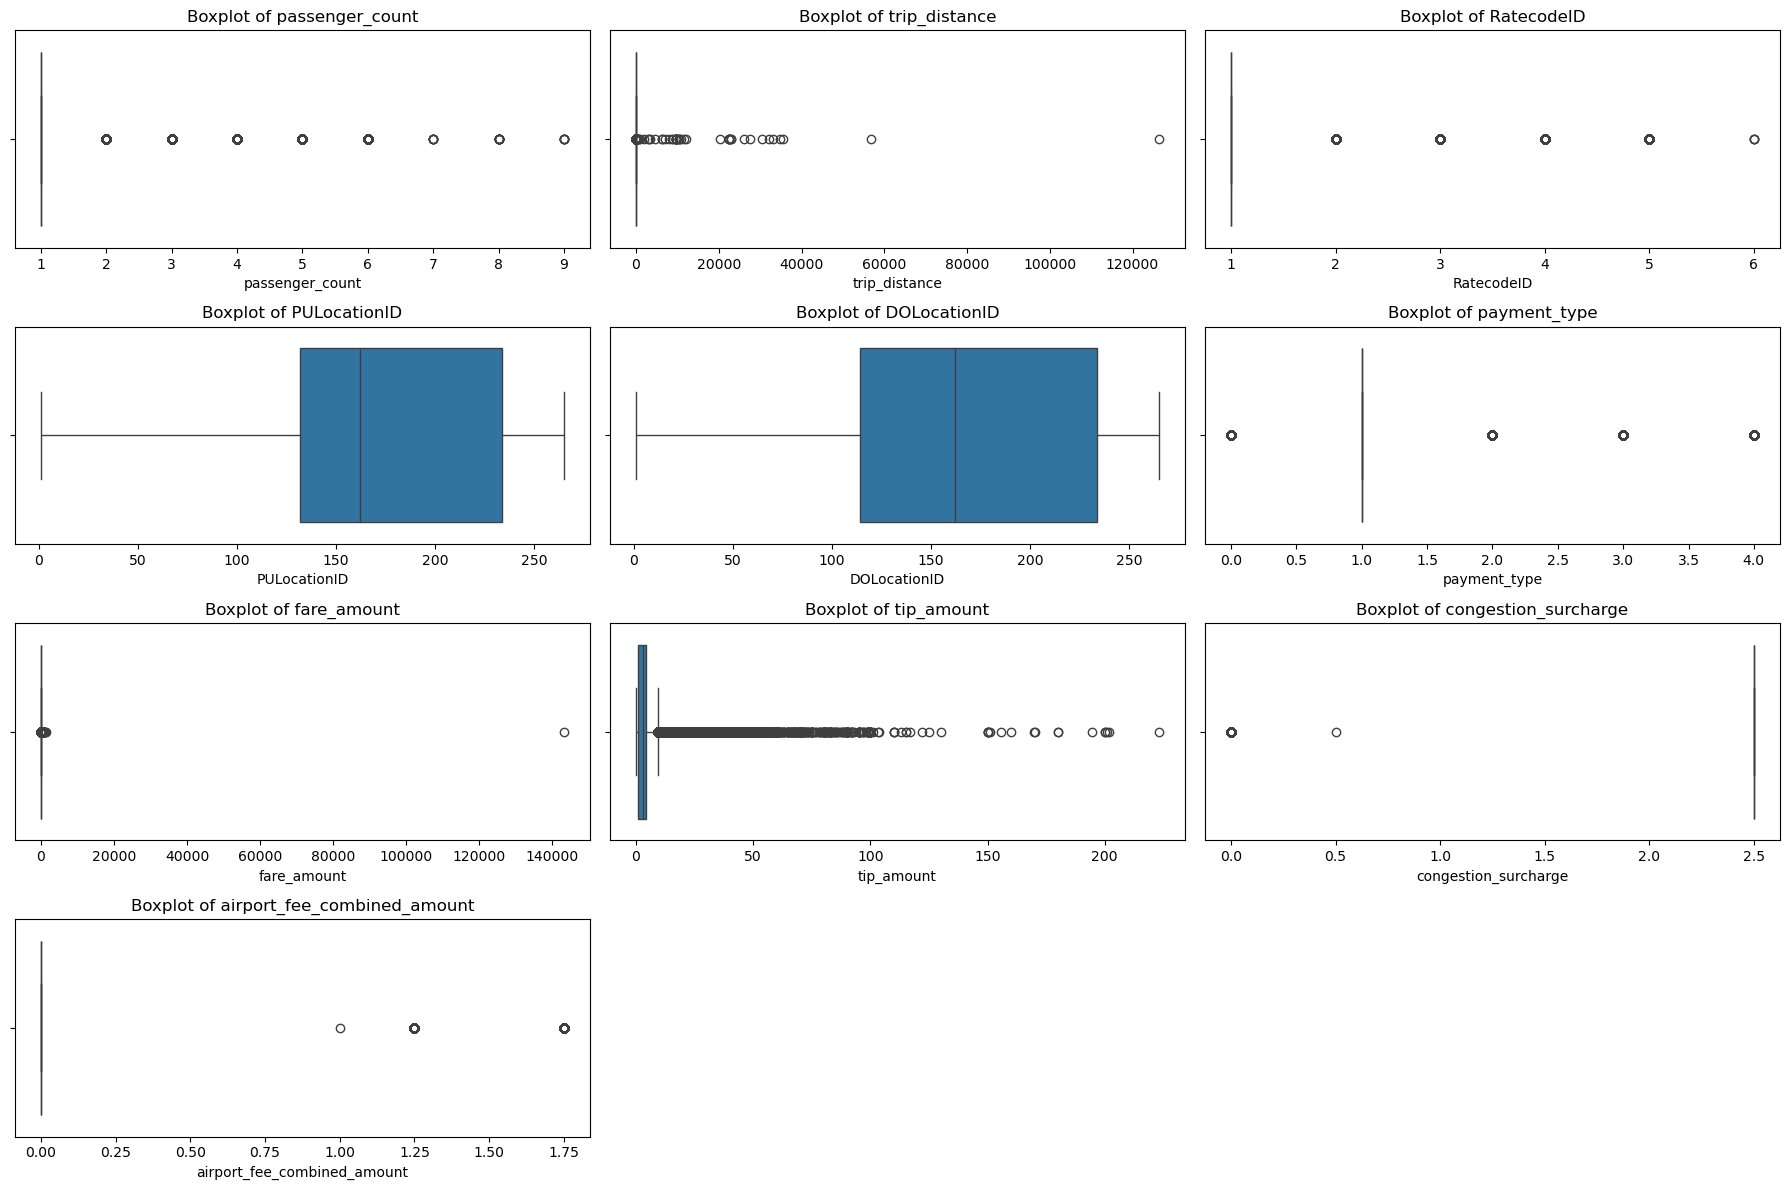

In [82]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns

# Visualize outliers using box plots for key numeric columns
# Boxplot for numerical columns to visualize outliers
numerical_columns = [
    'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID',
    'DOLocationID', 'payment_type', 'fare_amount', 'tip_amount',
    'congestion_surcharge', 'airport_fee_combined_amount'
]

plt.figure(figsize=(18, 12))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

**2.3.1.1** Handling Outliers for `passenger_count`.

In [83]:
# remove passenger_count > 6
df=df[~(df['passenger_count'] > 6)]

# Remove rows where passenger_count is 0
df = df[df['passenger_count'] >= 0]


**2.3.1.2** Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- **No Such entry present**

In [84]:
df[(df['trip_distance'] == 0) & (df['fare_amount'] < 0)].count()

index                          0
VendorID                       0
tpep_pickup_datetime           0
tpep_dropoff_datetime          0
passenger_count                0
trip_distance                  0
RatecodeID                     0
PULocationID                   0
DOLocationID                   0
payment_type                   0
fare_amount                    0
tip_amount                     0
improvement_surcharge          0
total_amount                   0
congestion_surcharge           0
pickup_date_derived            0
airport_fee_combined_amount    0
dtype: int64

**2.3.1.3** Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)


In [85]:
print(f"Shape before removing invalid zero-distance/fare trips: {df.shape}")
df = df[~((df['trip_distance'] == 0) & (df['fare_amount'] == 0) & (df['PULocationID'] != df['DOLocationID']))]
print(f"Shape after removing invalid zero-distance/fare trips: {df.shape}")


Shape before removing invalid zero-distance/fare trips: (1896379, 17)
Shape after removing invalid zero-distance/fare trips: (1896316, 17)


**2.3.1.4** Removing extreme outliers for `fare_amount` and `trip_distance`

In [86]:
df = df[~(df['fare_amount'] >100000)]
df = df[~(df['trip_distance'] >50000)]

**2.3.1.5** Entries where `trip_distance` is more than 250  miles.

In [87]:
# Remove rows where trip_distance is more than 120 miles
df = df[df['trip_distance'] < 120]

**2.3.1.6**  Outliers for `tpep_pickup_datetime` and `tpep_dropoff_datetime`.

In [88]:
print(f"Shape before filtering trips outside 2023: {df.shape}")
invalid_years = df[(df['tpep_pickup_datetime'].dt.year != 2023) | (df['tpep_dropoff_datetime'].dt.year != 2023)]
df.drop(invalid_years.index, inplace=True)
print(f"Shape after filtering trips outside 2023: {df.shape}")


Shape before filtering trips outside 2023: (1896260, 17)
Shape after filtering trips outside 2023: (1896233, 17)


**2.3.1.7** Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

In [89]:
df['payment_type'].value_counts(dropna=False)

payment_type
1    1492300
2     316404
0      64843
4      13676
3       9010
Name: count, dtype: int64

**2.3.1.8** Remove entries where `payment_type` is 0

In [90]:
# Remove entries where payment_type is 0
df = df[df['payment_type'] != 0]

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [91]:
df.columns.tolist()

['index',
 'VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'tip_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'pickup_date_derived',
 'airport_fee_combined_amount']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

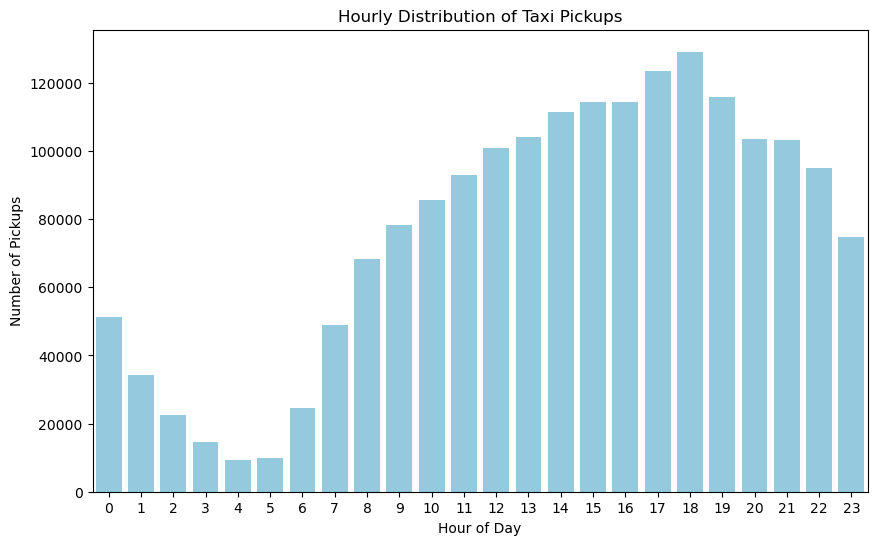

In [92]:
# Find and show the hourly trends in taxi pickups

df['pickup_hour_derived'] = df['tpep_pickup_datetime'].dt.hour
hour_pickup = df['pickup_hour_derived'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=hour_pickup.index, y=hour_pickup.values, color='skyblue')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Pickups')
plt.title('Hourly Distribution of Taxi Pickups')
plt.xticks(range(24))
plt.show()

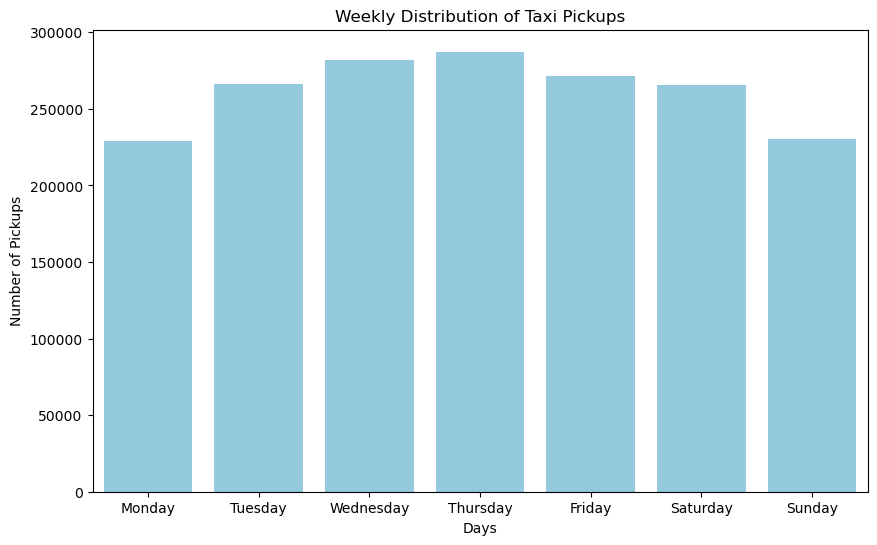

In [93]:
# Find and show the daily trends in taxi pickups (days of the week)

df['pickup_days_derived'] = df['tpep_pickup_datetime'].dt.day_of_week
day_name_map = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df['pickup_day_name_derived'] = df['pickup_days_derived'].map(day_name_map)
days = df['pickup_day_name_derived'].value_counts().reindex(day_name_map.values())


plt.figure(figsize=(10, 6))
sns.barplot(x=days.index, y=days.values, color='skyblue')
plt.xlabel('Days')
plt.ylabel('Number of Pickups')
plt.title('Weekly Distribution of Taxi Pickups')
plt.xticks(range(7))
plt.show()


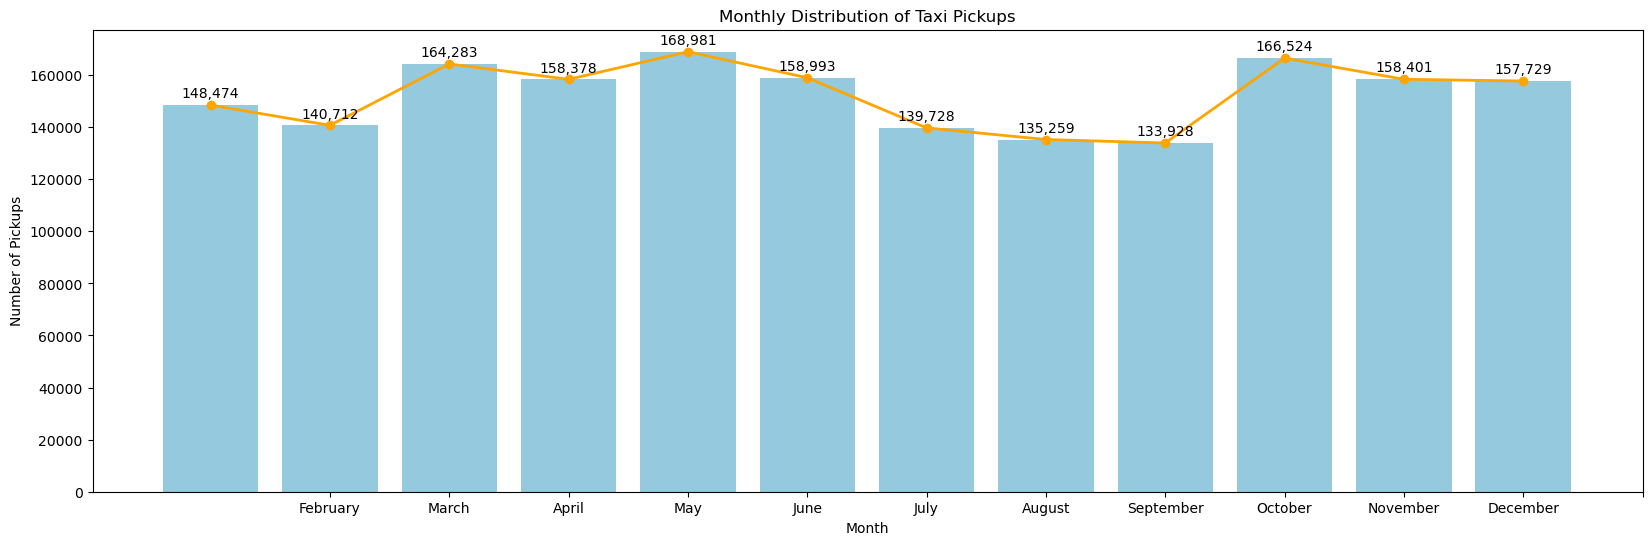

In [94]:
import calendar

# Show the monthly trends in pickups

df['pickup_months_derived'] = df['tpep_pickup_datetime'].dt.month
monthly = df['pickup_months_derived'].value_counts().sort_index()
plt.figure(figsize=(20, 6))
month_names = [calendar.month_name[m] for m in monthly.index]
sns.barplot(x=month_names, y=monthly.values, color='skyblue')
# Plot the line on top of the bars
plt.plot(month_names, monthly.values, color='orange', marker='o', linewidth=2)
plt.xlabel('Month')

# Add numbers on top of each bar
for i, value in enumerate(monthly.values):
    plt.text(i, value + max(monthly.values)*0.01, f'{value:,}', ha='center', va='bottom', fontsize=10)
plt.ylabel('Number of Pickups')
plt.title('Monthly Distribution of Taxi Pickups')
plt.xticks(monthly.index)
plt.show()

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/
negative values?

In [95]:
# Analyse the above parameters

# Check for zero or negative values in key financial columns
print("Zero or negative values in fare_amount:", (df['fare_amount'] <= 0).sum())
print("Zero or negative values in tip_amount:", (df['tip_amount'] <= 0).sum())
print("Zero or negative values in total_amount:", (df['total_amount'] <= 0).sum())
print("Zero or negative values in trip_distance:", (df['trip_distance'] <= 0).sum())

Zero or negative values in fare_amount: 574
Zero or negative values in tip_amount: 410245
Zero or negative values in total_amount: 255
Zero or negative values in trip_distance: 22962


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

yes, if we want to do finance analysis its better to remove the 0 and negative vaues.

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [96]:
# Create a df with non zero entries for the selected parameters.

non_zero_df = df[(df['fare_amount'] != 0) & (df['tip_amount'] != 0) & (df['total_amount'] != 0) & (df['trip_distance'] != 0)]

#After removing the 0 and -ve values 
print("Zero or negative values in fare_amount:", (non_zero_df['fare_amount'] <= 0).sum())
print("Zero or negative values in tip_amount:", (non_zero_df['tip_amount'] <= 0).sum())
print("Zero or negative values in total_amount:", (non_zero_df['total_amount'] <= 0).sum())
print("Zero or negative values in trip_distance:", (non_zero_df['trip_distance'] <= 0).sum())


Zero or negative values in fare_amount: 0
Zero or negative values in tip_amount: 0
Zero or negative values in total_amount: 0
Zero or negative values in trip_distance: 0


**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

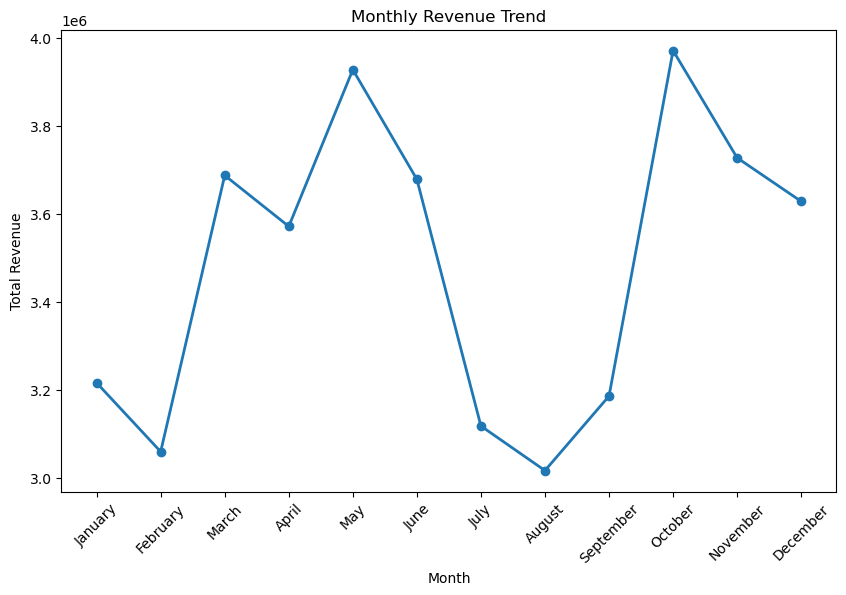

In [97]:
# Group data by month and analyse monthly revenue

monthly_revenue = non_zero_df.groupby('pickup_months_derived')['total_amount'].sum().sort_index()

plt.figure(figsize=(10, 6))
plt.plot(monthly_revenue.index, monthly_revenue.values, marker='o', linewidth=2)
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.title('Monthly Revenue Trend')
plt.xticks(monthly_revenue.index, [calendar.month_name[m] for m in monthly_revenue.index], rotation=45)
plt.show()


**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

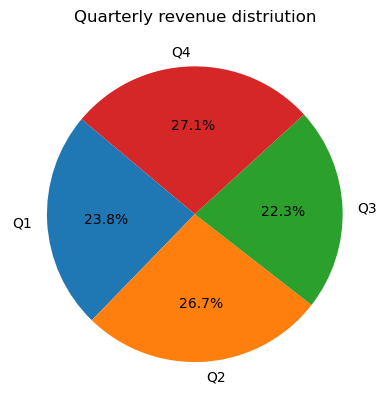

In [98]:
# Calculate proportion of each quarter

def convertMonthToQuarter(month):
    if month in [1,2,3]:
        return 'Q1'
    elif month in [4,5,6]:
        return 'Q2'
    elif month in [7,8,9]:
        return 'Q3'
    else:
        return 'Q4'

non_zero_df['quarter_derived'] = non_zero_df['pickup_months_derived'].apply(convertMonthToQuarter)
quarter_revenue  = non_zero_df.groupby('quarter_derived')['total_amount'].sum().sort_index()


plt.pie(quarter_revenue, labels=quarter_revenue.index, autopct='%1.1f%%', startangle=140)
plt.title("Quarterly revenue distriution")
plt.show()

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

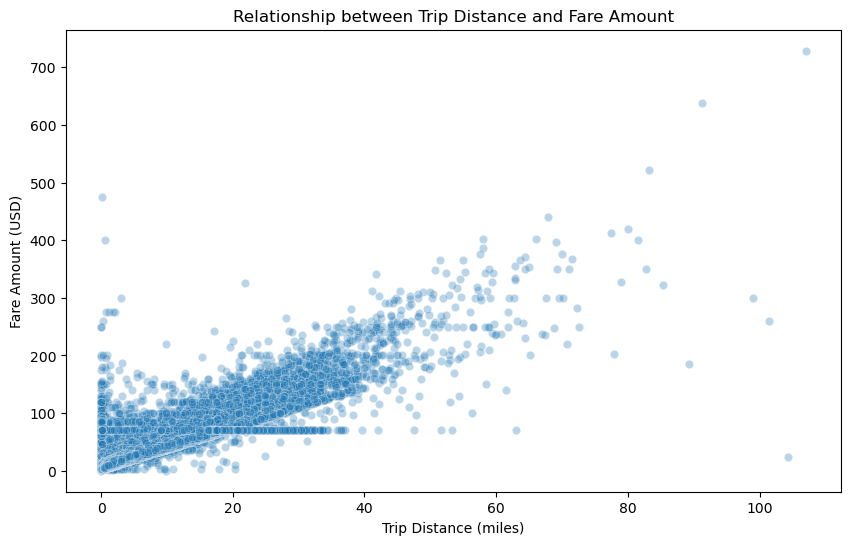

In [99]:
# Show how trip fare is affected by distance

# Visualise the relationship between trip_distance and fare_amount, excluding zero distances

# Filter out trips with zero distance
finance_df = non_zero_df[non_zero_df['trip_distance'] > 0]

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_distance', y='fare_amount', data=non_zero_df, alpha=0.3)
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount (USD)')
plt.title('Relationship between Trip Distance and Fare Amount')

plt.show()



**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

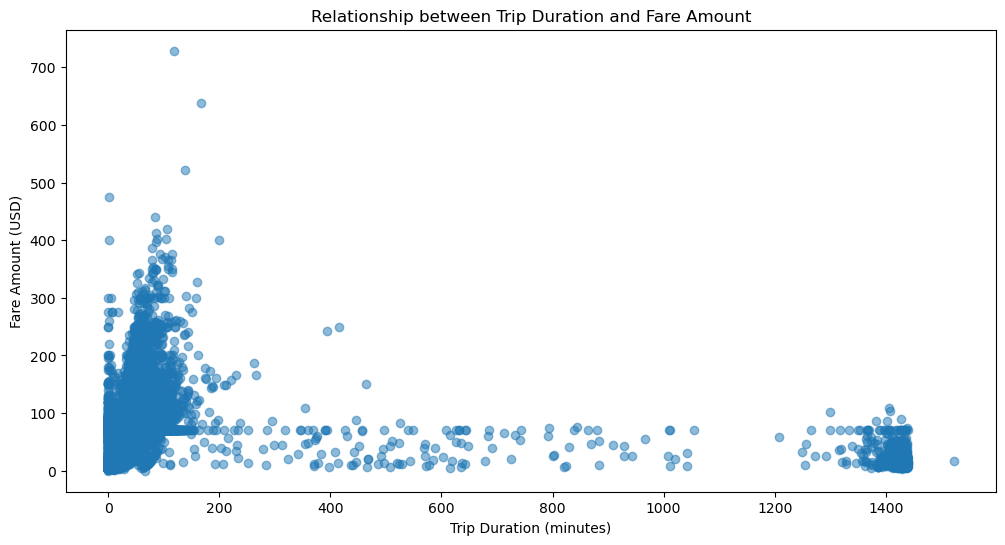

Correlation between Trip Duration and Fare Amount: 0.33


In [100]:
# Show relationship between fare and trip duration

# Calculate trip duration in minutes
non_zero_df['trip_duaration_derived'] = (non_zero_df['tpep_dropoff_datetime'] - non_zero_df['tpep_pickup_datetime']).dt.total_seconds() / 60

# Remove rows with negative trip duration
non_zero_df = non_zero_df[non_zero_df['trip_duaration_derived'] >= 0]

non_zero_df['trip_duaration_derived'].value_counts(dropna=False).sort_index()
plt.figure(figsize=(12, 6))
plt.scatter(non_zero_df['trip_duaration_derived'], non_zero_df['fare_amount'], alpha=0.5)
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Fare Amount (USD)')
plt.title('Relationship between Trip Duration and Fare Amount')
plt.show()

# Calculate the correlation value between trip_duration and fare_amount
correlation_value_duration_fare = non_zero_df['trip_duaration_derived'].corr(non_zero_df['fare_amount'])
print(f'Correlation between Trip Duration and Fare Amount: {correlation_value_duration_fare:.2f}')

Correlation between Number of Passengers and Fare Amount: 0.04


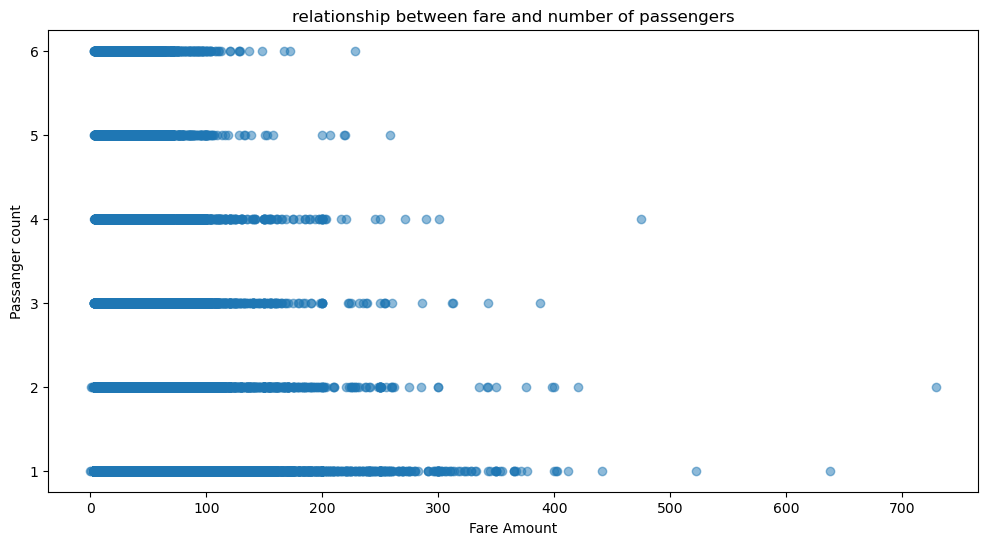

In [101]:
# Show relationship between fare and number of passengers
plt.figure(figsize=(12, 6))
# Plot the relationship between fare_amount and passenger_count
plt.scatter(x='fare_amount', y='passenger_count', data=non_zero_df, alpha=0.5)
plt.xlabel("Fare Amount")
plt.ylabel("Passanger count")
plt.title("relationship between fare and number of passengers")
# Calculate the correlation value between passenger_count and fare_amount
correlation_value_passenger_fare = non_zero_df['passenger_count'].corr(non_zero_df['fare_amount'])
print(f'Correlation between Number of Passengers and Fare Amount: {correlation_value_passenger_fare:.2f}')


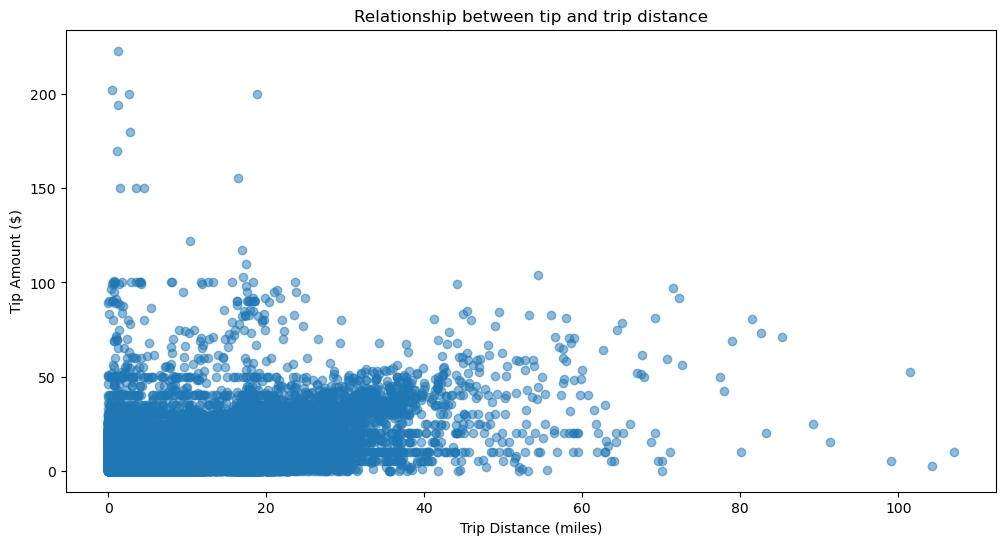

Correlation between Trip Distance and Tip Amount: 0.80


In [103]:
# Show relationship between tip and trip distance
plt.figure(figsize=(12, 6))

# Plot the relationship between tip_amount and trip_distance
plt.scatter(x='trip_distance', y='tip_amount', data=non_zero_df, alpha=0.5)
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Tip Amount ($)")
plt.title("Relationship between tip and trip distance")
plt.show()
# Correlation value between trip_distance and tip_amount
correlation_value_tip_distance = non_zero_df['trip_distance'].corr(non_zero_df['tip_amount'])
print(f'Correlation between Trip Distance and Tip Amount: {correlation_value_tip_distance:.2f}')

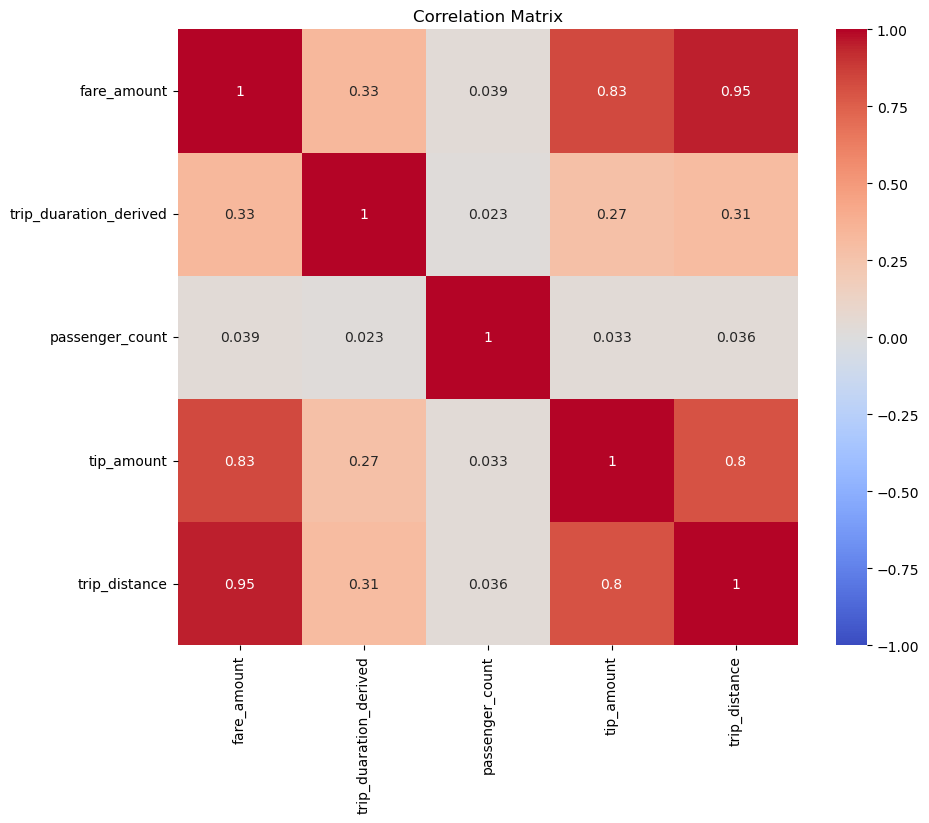

In [104]:
# Select the relevant columns for correlation analysis
correlation_columns = ['fare_amount', 'trip_duaration_derived', 'passenger_count', 'tip_amount', 'trip_distance']

# Calculate the correlation matrix
correlation_matrix = non_zero_df[correlation_columns].corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

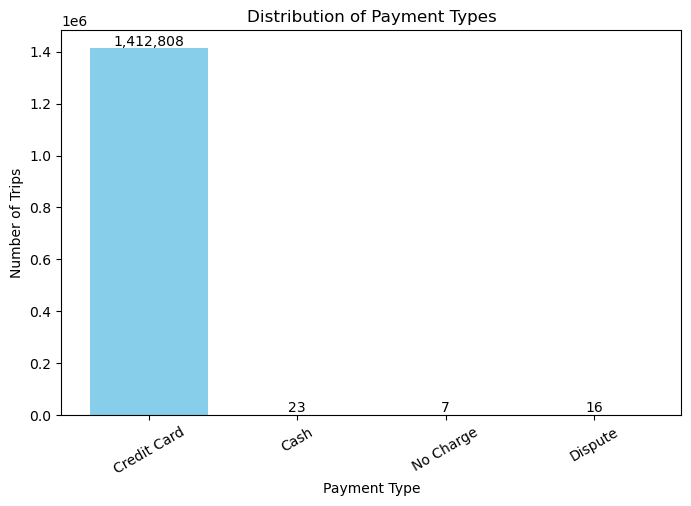

In [105]:
# Analyse the distribution of different payment types (payment_type).
payment_type_counts = non_zero_df['payment_type'].value_counts().sort_index()

payment_type_map = {
    1: 'Credit Card',
    2: 'Cash',
    3: 'No Charge',
    4: 'Dispute',
    5: 'Unknown',
    6: 'Voided Trip'
}

# Map the payment type codes to their names
payment_type_counts_named = payment_type_counts.rename(index=payment_type_map)

plt.figure(figsize=(8, 5))
bars = plt.bar(payment_type_counts_named.index, payment_type_counts_named.values, color='skyblue')
plt.xlabel('Payment Type')
# Add numbers on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{int(height):,}', ha='center', va='bottom', fontsize=10)
plt.ylabel('Number of Trips')
plt.title('Distribution of Payment Types')
plt.xticks(rotation=30)
plt.show()


- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [441]:
# !pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [106]:
# Install geopandas if not already installed

import geopandas as gpd
import os

# Read the shapefile using geopandas
TAXI_ZONE_DATASET_DIRECTORY_NAME = 'taxi_zones'
TAXI_ZONE_DATASET_FILE_NAME = 'taxi_zones.shp'
TAXI_ZONE_DATASET_FILE_PATH = os.path.join(os.getcwd(), TAXI_ZONE_DATASET_DIRECTORY_NAME, TAXI_ZONE_DATASET_FILE_NAME)
zones = gpd.read_file(TAXI_ZONE_DATASET_FILE_PATH)
zones.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144..."


Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<Axes: >

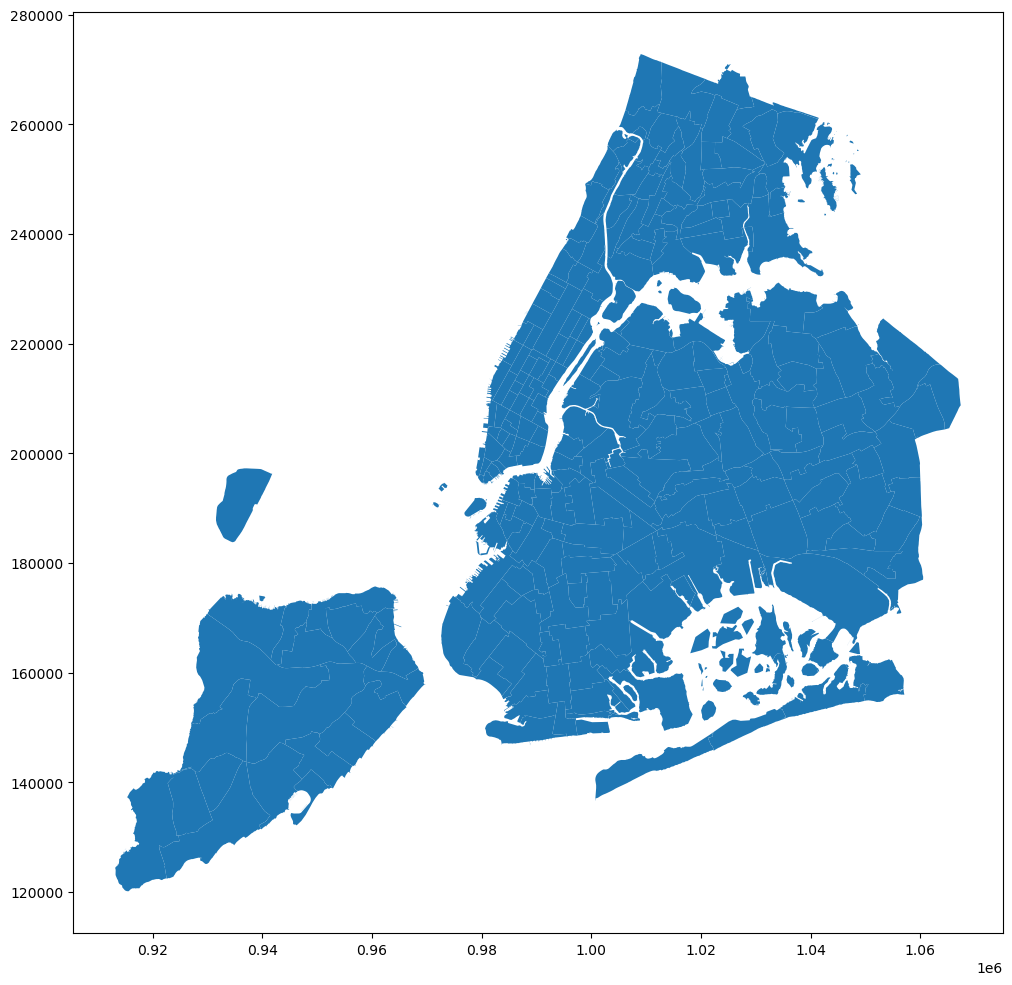

In [107]:
# print(zones.info())
zones.plot(figsize=(12, 12))

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [108]:
# Merge zones and trip records using LocationID and PULocationID
merged_df = non_zero_df.merge(zones, left_on='PULocationID', right_on='LocationID', how='left')

# Display the first few rows of the merged DataFrame
merged_df.head()


,index,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,...,pickup_months_derived,quarter_derived,trip_duaration_derived,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1113,2,2023-01-01 00:16:41,2023-01-01 00:21:46,2,1.24,1,161,237,1,...,1,Q1,5.083333,161.0,0.035804,0.000072,Midtown Center,161.0,Manhattan,"POLYGON ((991081.026 214453.698, 990952.644 21..."
1,4719,1,2023-01-01 00:42:56,2023-01-01 01:16:33,2,7.10,1,246,37,1,...,1,Q1,33.616667,246.0,0.069467,0.000281,West Chelsea/Hudson Yards,246.0,Manhattan,"POLYGON ((983031.177 217138.506, 983640.32 216..."
2,1548,2,2023-01-01 00:58:00,2023-01-01 01:08:31,2,1.59,1,79,164,1,...,1,Q1,10.516667,79.0,0.042625,0.000108,East Village,79.0,Manhattan,"POLYGON ((988746.067 202151.955, 988733.885 20..."
3,2504,2,2023-01-01 00:16:06,2023-01-01 00:31:59,1,3.16,1,79,256,1,...,1,Q1,15.883333,79.0,0.042625,0.000108,East Village,79.0,Manhattan,"POLYGON ((988746.067 202151.955, 988733.885 20..."
4,1686,2,2023-01-01 00:44:09,2023-01-01 01:01:17,1,7.64,1,132,95,1,...,1,Q1,17.133333,132.0,0.245479,0.002038,JFK Airport,132.0,Queens,"MULTIPOLYGON (((1032791.001 181085.006, 103283..."


**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [109]:
# Group data by PULocationID and calculate the number of trips for each location
trips_per_location = merged_df.groupby('PULocationID').size().reset_index(name='total_trips')

# Display the first few rows of the result
trips_per_location.head()


,PULocationID,total_trips
0,1,35
1,2,2
2,4,1403
3,6,1
4,7,253


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

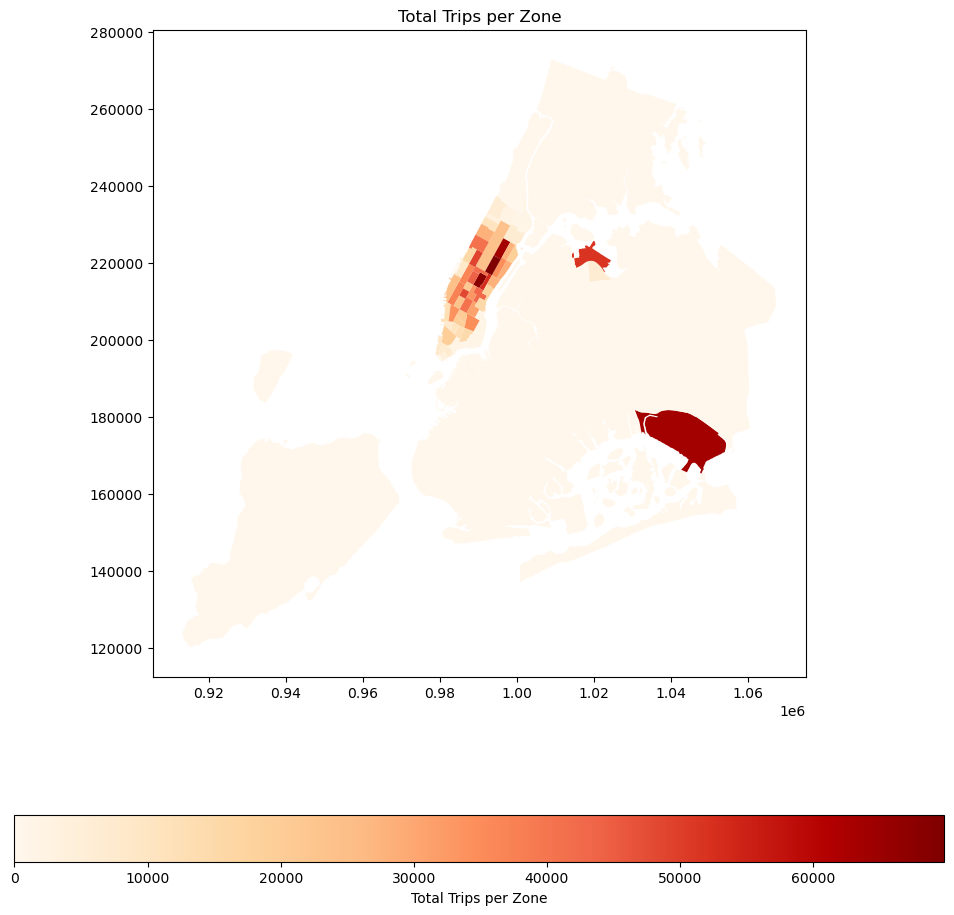

In [110]:
# Merge trip counts back to the zones GeoDataFrame
zones_with_trips = zones.merge(trips_per_location, left_on='LocationID', right_on='PULocationID', how='left')

# Fill NaN values with 0 (for zones with no trips)
zones_with_trips['total_trips'].fillna(0, inplace=True)

# Plot the map of zones showing total trips per zone
zones_with_trips.plot(column='total_trips', cmap='OrRd', legend=True, legend_kwds={'label': "Total Trips per Zone", 'orientation': "horizontal"}, figsize=(12, 12))
plt.title('Total Trips per Zone')
plt.show()



The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

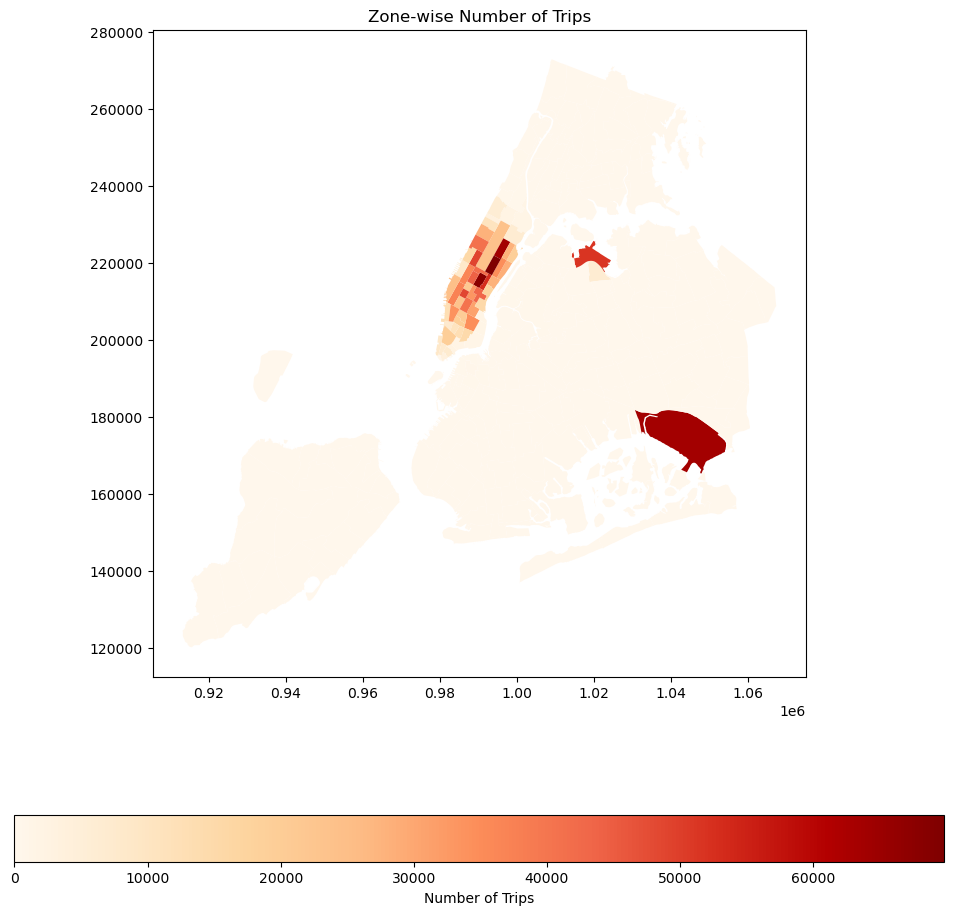

In [111]:
# Define figure and axis

# Plot the map and display it

# Assuming df contains the trip data and zones is a GeoDataFrame with zone geometries

# Aggregate the number of trips per zone using PULocationID
zone_trip_counts = merged_df['PULocationID'].value_counts().reset_index()
zone_trip_counts.columns = ['LocationID', 'trip_count']

# Merge the trip counts with the GeoDataFrame
zones = zones.merge(zone_trip_counts, on='LocationID', how='left')

# Fill NaN values with 0 (if there are zones with no trips)
zones['trip_count'] = zones['trip_count'].fillna(0)

# Define the figure and axis for the plot
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

# Plot the GeoDataFrame with the trip counts
zones.plot(column='trip_count', ax=ax, legend=True, legend_kwds={'label': "Number of Trips", 'orientation': "horizontal"}, cmap='OrRd')

# Display the plot
plt.title('Zone-wise Number of Trips')
plt.show()

In [112]:
# can you try displaying the zones DF sorted by the number of trips?

# Sort the zones by the number of trips
zones_sorted = zones.sort_values(by='trip_count', ascending=False)

# Display the sorted zones
zones_sorted[['zone', 'trip_count']]


,zone,trip_count
236,Upper East Side South,69858.0
160,Midtown Center,67729.0
235,Upper East Side North,63695.0
131,JFK Airport,63635.0
161,Midtown East,52689.0
...,...,...
14,Bay Terrace/Fort Totten,0.0
29,Broad Channel,0.0
152,Marble Hill,0.0
4,Arden Heights,0.0


Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [146]:
# Find routes which have the slowest speeds at different times of the day
# Group by pickup and dropoff locations and hour of the day
# merged_df
grouped = merged_df.groupby(['PULocationID', 'DOLocationID', 'pickup_hour_derived'])

# Calculate the average trip duration and distance for each group
route_stats = grouped.agg({
    'trip_duaration_derived': 'mean',
    'trip_distance': 'mean'
}).reset_index()

# Calculate the speed for each route and hour
route_stats['speed'] = route_stats['trip_distance'] / (route_stats['trip_duaration_derived'] / 60)  # speed in miles per hour

# Identify slow routes (e.g., routes with speed less than a threshold, say 10 mph)
slow_routes = route_stats[route_stats['speed'] < 10]

# Display the slow routes
slow_routes.head().sort_index()

,PULocationID,DOLocationID,pickup_hour_derived,trip_duaration_derived,trip_distance,speed
4,1,1,11,1.033333,0.030000,1.741935
23,4,4,0,1.927778,0.273333,8.507205
24,4,4,1,4.850000,0.520000,6.432990
25,4,4,2,2.700000,0.390000,8.666667
26,4,4,3,2.141667,0.355000,9.945525


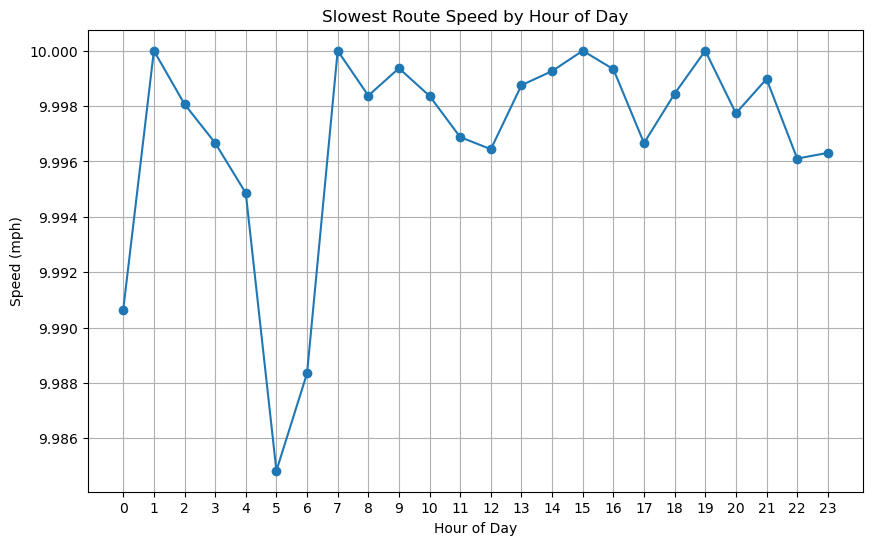

In [121]:
# Find routes which have the slowest speeds at different times of the day
slow_routes_by_hour = slow_routes.groupby('pickup_hour_derived').apply(lambda x: x.nlargest(1, 'speed')).reset_index(drop=True)

# Draw a line plot of speed vs. pickup_hour_derived for the slowest routes
plt.figure(figsize=(10, 6))
plt.plot(slow_routes_by_hour['pickup_hour_derived'], slow_routes_by_hour['speed'], marker='o')
plt.xlabel('Hour of Day')
plt.ylabel('Speed (mph)')
plt.title('Slowest Route Speed by Hour of Day')
plt.xticks(range(24))
plt.grid(True)
plt.show()



How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

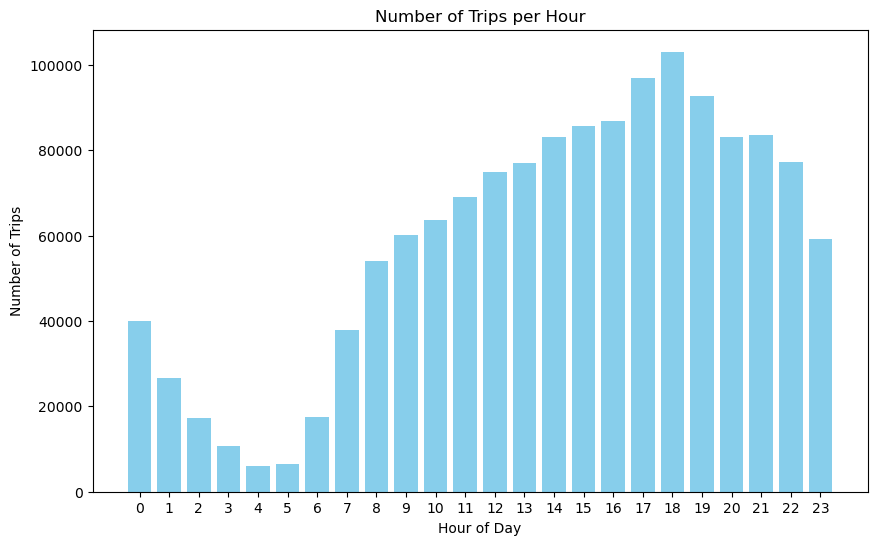

The busiest hour is 18:00 with 103059 trips.


In [123]:
# Visualise the number of trips per hour and find the busiest hour

# Calculate the number of trips for each hour of the day
hourly_trip_counts = merged_df['pickup_hour_derived'].value_counts().sort_index()

# Plot the number of trips for each hour of the day
plt.figure(figsize=(10, 6))
plt.bar(hourly_trip_counts.index, hourly_trip_counts.values, color='skyblue')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.title('Number of Trips per Hour')
plt.xticks(range(24))
plt.show()
# Find the busiest hour and show the number of trips for that hour
busiest_hour = hourly_trip_counts.idxmax()
busiest_hour_trips = hourly_trip_counts.max()
print(f'The busiest hour is {busiest_hour}:00 with {busiest_hour_trips} trips.')


Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [124]:
# Find the five busiest hours
busiest_hours = hourly_trip_counts.nlargest(5)

# Display the actual number of trips in the five busiest hours
print("Actual number of trips in the five busiest hours:")
busiest_hours



Actual number of trips in the five busiest hours:


pickup_hour_derived
18    103059
17     96953
19     92730
16     86841
15     85666
Name: count, dtype: int64

In [125]:
# Define the sampling ratio
sampling_ratio = 10

# Scale up the number of trips
scaled_trips_per_location = trips_per_location.copy()
scaled_trips_per_location['total_trips'] *= sampling_ratio

# Display the scaled-up number of trips
scaled_trips_per_location.head()

,PULocationID,total_trips
0,1,350
1,2,20
2,4,14030
3,6,10
4,7,2530


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1412884 entries, 0 to 1412883
Data columns (total 30 columns):
 #   Column                       Non-Null Count    Dtype         
---  ------                       --------------    -----         
 0   index                        1412884 non-null  int64         
 1   VendorID                     1412884 non-null  int64         
 2   tpep_pickup_datetime         1412884 non-null  datetime64[us]
 3   tpep_dropoff_datetime        1412884 non-null  datetime64[us]
 4   passenger_count              1412884 non-null  int32         
 5   trip_distance                1412884 non-null  float64       
 6   RatecodeID                   1412884 non-null  int32         
 7   PULocationID                 1412884 non-null  int64         
 8   DOLocationID                 1412884 non-null  int64         
 9   payment_type                 1412884 non-null  int64         
 10  fare_amount                  1412884 non-null  float64       
 11  tip_amount 

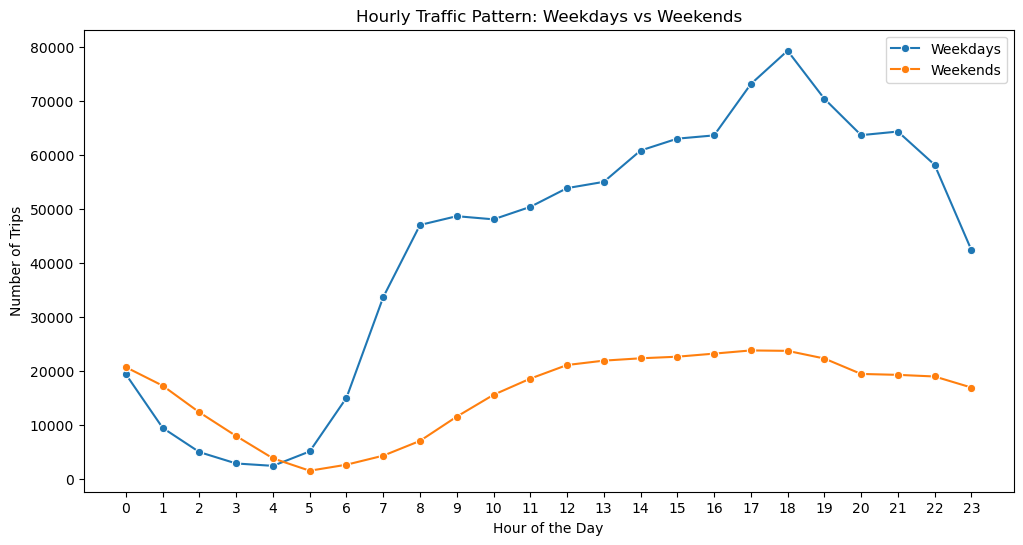

In [132]:
# Compare traffic trends for the week days and weekends
merged_df.info()
# Separate the data into weekdays and weekends
weekdays_df = merged_df[merged_df['pickup_days_derived'] < 5]  # Monday to Friday
weekends_df = merged_df[merged_df['pickup_days_derived'] >= 5]  # Saturday and Sunday

# Calculate the number of trips for each hour of the day for weekdays
weekday_hourly_pickups = weekdays_df['pickup_hour_derived'].value_counts().sort_index()

# Calculate the number of trips for each hour of the day for weekends
weekend_hourly_pickups = weekends_df['pickup_hour_derived'].value_counts().sort_index()

# Plot the hourly traffic pattern for weekdays
plt.figure(figsize=(12, 6))
sns.lineplot(x=weekday_hourly_pickups.index, y=weekday_hourly_pickups.values, marker='o', label='Weekdays')
sns.lineplot(x=weekend_hourly_pickups.index, y=weekend_hourly_pickups.values, marker='o', label='Weekends')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.title('Hourly Traffic Pattern: Weekdays vs Weekends')
plt.xticks(range(24))
plt.legend()
plt.show()          





What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

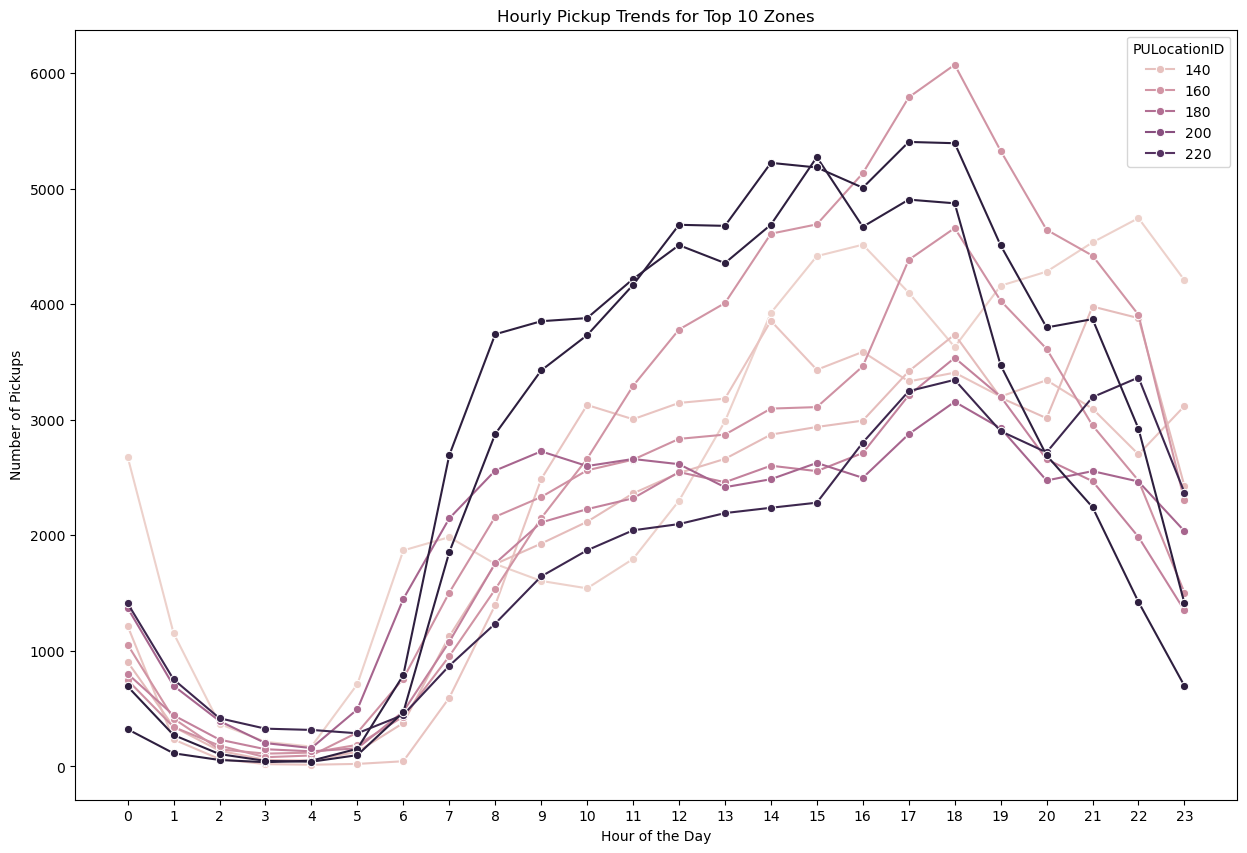

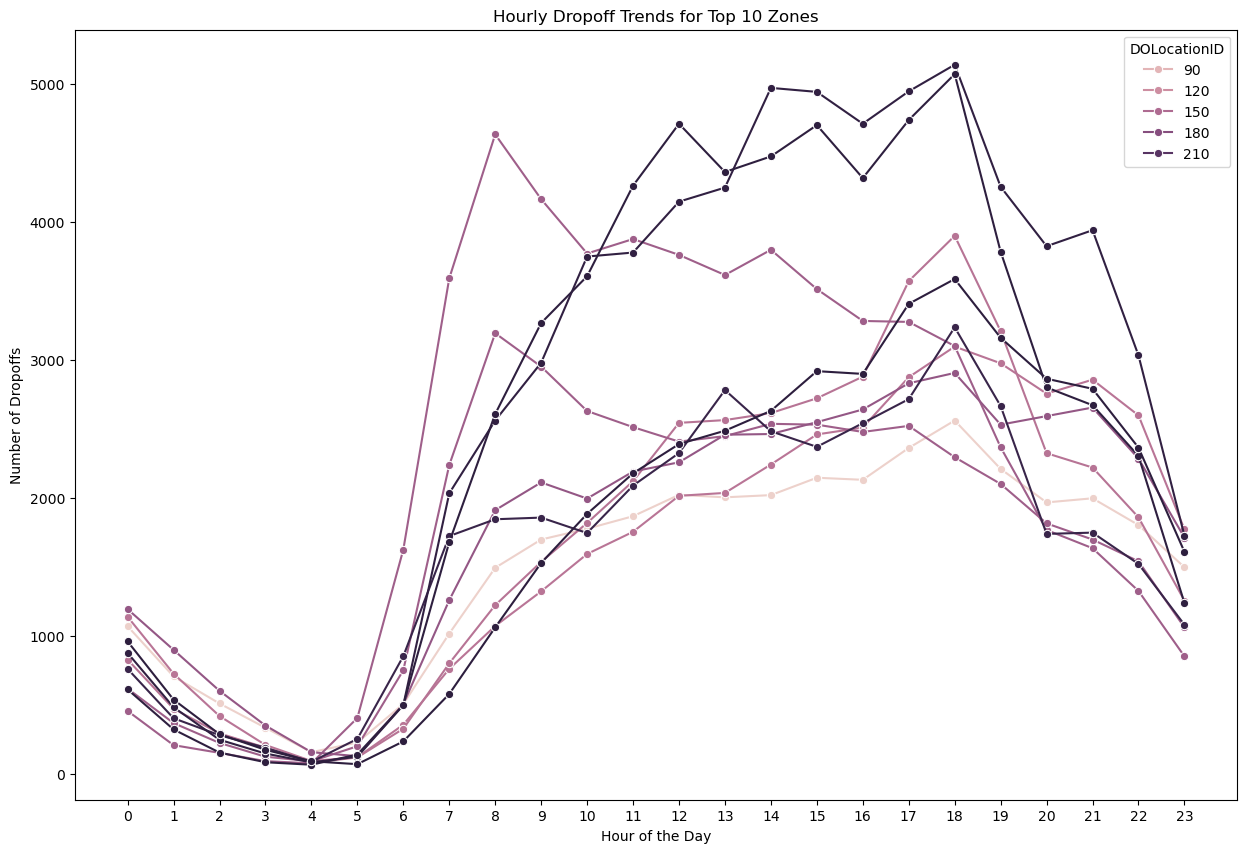

In [133]:
# Find top 10 pickup and dropoff zones

# Group by PULocationID and hour of the day to find the number of pickups
pickup_counts = merged_df.groupby(['PULocationID', 'pickup_hour_derived']).size().reset_index(name='pickup_count')

# Find the top 10 zones with the highest number of hourly pickups
top_pickup_zones = pickup_counts.groupby('PULocationID')['pickup_count'].sum().nlargest(10).index

# Filter the data to include only the top 10 pickup zones
top_pickup_data = pickup_counts[pickup_counts['PULocationID'].isin(top_pickup_zones)]

# Plot the hourly pickup trends for the top 10 zones
plt.figure(figsize=(15, 10))
sns.lineplot(data=top_pickup_data, x='pickup_hour_derived', y='pickup_count', hue='PULocationID', marker='o')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Pickups')
plt.title('Hourly Pickup Trends for Top 10 Zones')
plt.legend(title='PULocationID')
plt.xticks(range(24))
plt.show()

# Group by DOLocationID and hour of the day to find the number of dropoffs
dropoff_counts = merged_df.groupby(['DOLocationID', 'pickup_hour_derived']).size().reset_index(name='dropoff_count')

# Find the top 10 zones with the highest number of hourly dropoffs
top_dropoff_zones = dropoff_counts.groupby('DOLocationID')['dropoff_count'].sum().nlargest(10).index

# Filter the data to include only the top 10 dropoff zones
top_dropoff_data = dropoff_counts[dropoff_counts['DOLocationID'].isin(top_dropoff_zones)]

# Plot the hourly dropoff trends for the top 10 zones
plt.figure(figsize=(15, 10))
sns.lineplot(data=top_dropoff_data, x='pickup_hour_derived', y='dropoff_count', hue='DOLocationID', marker='o')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Dropoffs')
plt.title('Hourly Dropoff Trends for Top 10 Zones')
plt.legend(title='DOLocationID')
plt.xticks(range(24))
plt.show()


**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [134]:
# Find the top 10 and bottom 10 pickup/dropoff ratios

# Calculate the number of pickups for each zone
pickup_counts = merged_df['PULocationID'].value_counts().reset_index()
pickup_counts.columns = ['LocationID', 'pickup_count']

# Calculate the number of dropoffs for each zone
dropoff_counts = merged_df['DOLocationID'].value_counts().reset_index()
dropoff_counts.columns = ['LocationID', 'dropoff_count']

# Merge the pickup and dropoff counts
pickup_dropoff_counts = pickup_counts.merge(dropoff_counts, on='LocationID', how='outer').fillna(0)

# Calculate the ratio of pickups to dropoffs
pickup_dropoff_counts['pickup_dropoff_ratio'] = pickup_dropoff_counts['pickup_count'] / pickup_dropoff_counts['dropoff_count']

# Display the 10 highest pickup/dropoff ratios
highest_ratios = pickup_dropoff_counts.nlargest(10, 'pickup_dropoff_ratio')
print("10 Highest Pickup/Dropoff Ratios:")
print(highest_ratios[['LocationID', 'pickup_dropoff_ratio']])

# Display the 10 lowest pickup/dropoff ratios
lowest_ratios = pickup_dropoff_counts.nsmallest(10, 'pickup_dropoff_ratio')
print("\n10 Lowest Pickup/Dropoff Ratios:")
print(lowest_ratios[['LocationID', 'pickup_dropoff_ratio']])


10 Highest Pickup/Dropoff Ratios:
     LocationID  pickup_dropoff_ratio
1             2                   inf
193         199                   inf
69           70             13.854978
126         132              4.738273
132         138              2.871280
201         207              1.714286
180         186              1.650092
42           43              1.387722
108         114              1.382174
243         249              1.330781

10 Lowest Pickup/Dropoff Ratios:
    LocationID  pickup_dropoff_ratio
2            3                   0.0
4            5                   0.0
14          15                   0.0
26          27                   0.0
29          30                   0.0
31          32                   0.0
43          44                   0.0
57          58                   0.0
77          78                   0.0
83          84                   0.0


**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [137]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

# Filter the data for trips during night hours (11 PM to 5 AM)
night_hours_df = merged_df[(merged_df['pickup_hour_derived'] >= 23) | (merged_df['pickup_days_derived'] <= 5)]

# Group by PULocationID to find the number of pickups during night hours
night_pickup_counts = night_hours_df['PULocationID'].value_counts().reset_index()
night_pickup_counts.columns = ['LocationID', 'pickup_count']

# Group by DOLocationID to find the number of dropoffs during night hours
night_dropoff_counts = night_hours_df['DOLocationID'].value_counts().reset_index()
night_dropoff_counts.columns = ['LocationID', 'dropoff_count']

# Find the top 10 pickup zones during night hours
top_night_pickup_zones = night_pickup_counts.nlargest(10, 'pickup_count')

# Find the top 10 dropoff zones during night hours
top_night_dropoff_zones = night_dropoff_counts.nlargest(10, 'dropoff_count')

# Display the top 10 pickup and dropoff zones during night hours
print("Top 10 Pickup Zones during Night Hours (11 PM to 5 AM):")
print(top_night_pickup_zones)

print("\nTop 10 Dropoff Zones during Night Hours (11 PM to 5 AM):")
print(top_night_dropoff_zones)

Top 10 Pickup Zones during Night Hours (11 PM to 5 AM):
   LocationID  pickup_count
0         237         63815
1         161         62248
2         236         57936
3         132         53726
4         162         47894
5         138         44404
6         142         43154
7         186         42299
8         230         39243
9         170         38811

Top 10 Dropoff Zones during Night Hours (11 PM to 5 AM):
   LocationID  dropoff_count
0         236          60860
1         237          56888
2         161          51383
3         170          38383
4         162          37743
5         239          37396
6         142          36489
7         230          35071
8         141          34858
9         163          31692


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

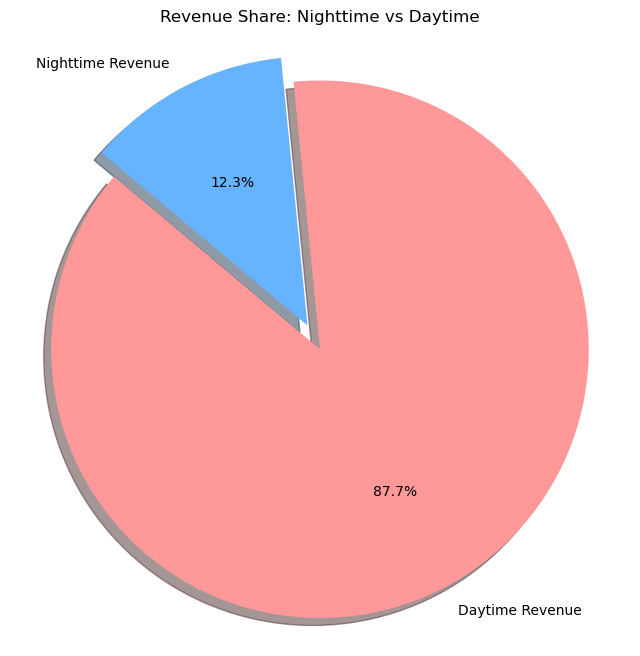

In [139]:
# Filter for night hours (11 PM to 5 AM)
night_hours_df = merged_df[(merged_df['pickup_hour_derived'] >= 23) | (merged_df['pickup_days_derived'] <= 5)]

# Calculate total revenue for night hours
night_revenue = night_hours_df['total_amount'].sum()

# Filter for day hours (6 AM to 10 PM)
day_hours_df = merged_df[(merged_df['pickup_days_derived'] >= 6) & (merged_df['pickup_hour_derived'] <= 22)]

# Calculate total revenue for day hours
day_revenue = day_hours_df['total_amount'].sum()

# Calculate the total revenue
total_revenue = merged_df['total_amount'].sum()

# Calculate the revenue share for night and day hours
night_revenue_share = (night_revenue / total_revenue) * 100
day_revenue_share = (day_revenue / total_revenue) * 100

# Visualize the revenue share using a pie chart
labels = ['Daytime Revenue', 'Nighttime Revenue']
sizes = [night_revenue_share, day_revenue_share]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)  # explode the 1st slice (Nighttime Revenue)

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Revenue Share: Nighttime vs Daytime')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [140]:
# Analyse the fare per mile per passenger for different passenger counts

# Calculate the fare per mile for each trip
merged_df['fare_per_mile_derived'] = merged_df['fare_amount'] / merged_df['trip_distance']

# Group by passenger count and calculate the average fare per mile
avg_fare_per_mile = merged_df.groupby('passenger_count')['fare_per_mile_derived'].mean().reset_index()

# Calculate the average fare per mile per passenger
avg_fare_per_mile['fare_per_mile_per_passenger'] = avg_fare_per_mile['fare_per_mile_derived'] / avg_fare_per_mile['passenger_count']

# Display the results
avg_fare_per_mile



,passenger_count,fare_per_mile_derived,fare_per_mile_per_passenger
0,1,9.265692,9.265692
1,2,10.005564,5.002782
2,3,9.986275,3.328758
3,4,15.731920,3.932980
4,5,7.945846,1.589169
5,6,7.708165,1.284694


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1412884 entries, 0 to 1412883
Data columns (total 31 columns):
 #   Column                       Non-Null Count    Dtype         
---  ------                       --------------    -----         
 0   index                        1412884 non-null  int64         
 1   VendorID                     1412884 non-null  int64         
 2   tpep_pickup_datetime         1412884 non-null  datetime64[us]
 3   tpep_dropoff_datetime        1412884 non-null  datetime64[us]
 4   passenger_count              1412884 non-null  int32         
 5   trip_distance                1412884 non-null  float64       
 6   RatecodeID                   1412884 non-null  int32         
 7   PULocationID                 1412884 non-null  int64         
 8   DOLocationID                 1412884 non-null  int64         
 9   payment_type                 1412884 non-null  int64         
 10  fare_amount                  1412884 non-null  float64       
 11  tip_amount 

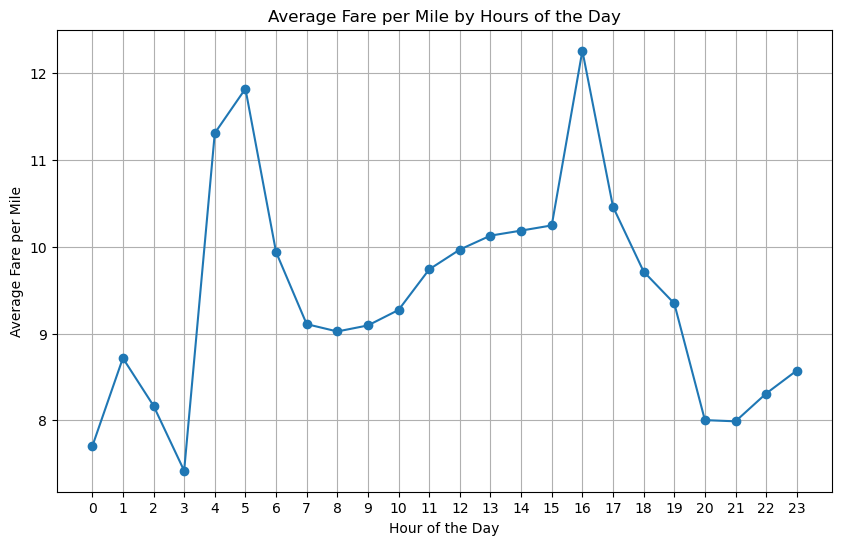

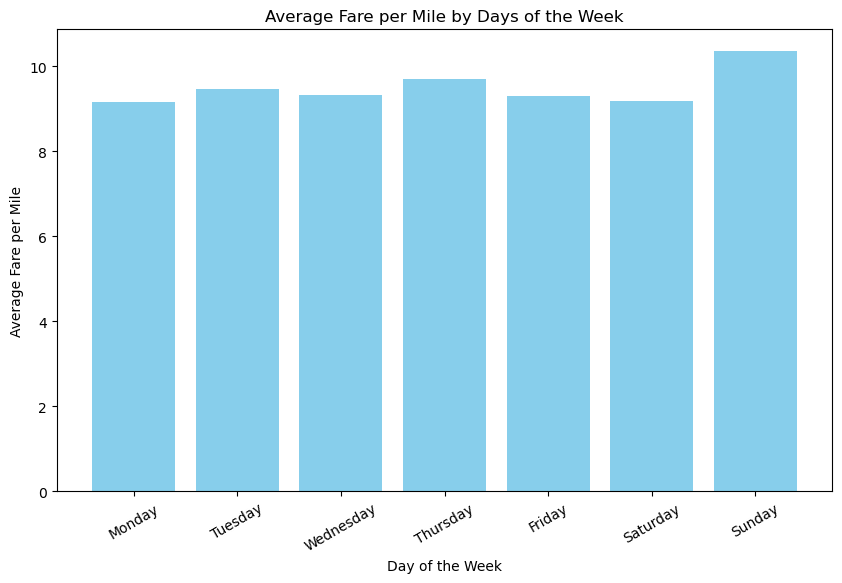

In [145]:
# Compare the average fare per mile for different days and for different times of the day

# Group by hour of the day and calculate the average fare per mile
merged_df.info()
avg_fare_per_mile_by_hour = merged_df.groupby('pickup_hour_derived')['fare_per_mile_derived'].mean().reset_index()

# Group by day of the week and calculate the average fare per mile
avg_fare_per_mile_by_day = merged_df.groupby('pickup_days_derived')['fare_per_mile_derived'].mean().reset_index()

# Map the day of the week to the corresponding day name
day_name_map = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
avg_fare_per_mile_by_day['pickup_day_name'] = avg_fare_per_mile_by_day['pickup_days_derived'].map(day_name_map)

# Plot the average fare per mile by hours of the day
plt.figure(figsize=(10, 6))
plt.plot(avg_fare_per_mile_by_hour['pickup_hour_derived'], avg_fare_per_mile_by_hour['fare_per_mile_derived'], marker='o')
plt.title('Average Fare per Mile by Hours of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Fare per Mile')
plt.xticks(range(24))
plt.grid(True)
plt.show()

# Plot the average fare per mile by days of the week
plt.figure(figsize=(10, 6))
plt.bar(avg_fare_per_mile_by_day['pickup_day_name'], avg_fare_per_mile_by_day['fare_per_mile_derived'], color='skyblue')
plt.title('Average Fare per Mile by Days of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Fare per Mile')
plt.xticks(rotation=30)
plt.show()


**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

In [ ]:
# Compare fare per mile for different vendors



**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [ ]:
# Defining distance tiers



##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [ ]:
#  Analyze tip percentages based on distances, passenger counts and pickup times



Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [ ]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%



**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

In [ ]:
# See how passenger count varies across hours and days




**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [ ]:
# How does passenger count vary across zones



In [ ]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.



Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [ ]:
# How often is each surcharge applied?



## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.